In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Dataset from kaggle - https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset

### Loading The Data

In [2]:
# List to store DataFrames
dfs = []

# Load the datasets
for i in os.listdir('./data/'):
    if i.endswith('.csv'):
        dfs.append(pd.read_csv(f'./data/{i}'))

In [3]:
# Data Dimensions of each individual dataset
for i, data in enumerate(dfs, start=1):
    rows, cols = data.shape
    print(f'df{i} -> {rows} rows, {cols} columns')

df1 -> 170366 rows, 79 columns
df2 -> 191033 rows, 79 columns
df3 -> 288602 rows, 79 columns
df4 -> 445909 rows, 79 columns
df5 -> 692703 rows, 79 columns
df6 -> 286467 rows, 79 columns
df7 -> 529918 rows, 79 columns
df8 -> 225745 rows, 79 columns


### Merging the Dataframe

In [4]:
# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, axis=0, ignore_index=True)

# Deleting DataFrames after merging
for df in dfs: del df

### Data Overview

In [5]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [6]:
# Get dataset dimensions
print(f"Dataset Dimensions: {data.shape}")

Dataset Dimensions: (2830743, 79)


In [7]:
# Display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [8]:
# Remove trailing spaces from column names
data.columns = data.columns.str.strip()

#### Label Distribution

In [ ]:
print(data['Label'].value_counts()) 

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


- Converting The Label Column into Normal and Abnormal representated by 0 and 1 respectively.

In [10]:
data['Label'] = data['Label'].map({'BENIGN': 0})
data['Label'] = data['Label'].fillna(1)

In [11]:
# convert Label column to int
data['Label'] = data['Label'].astype(int)

In [12]:
# Label distribution
print(data['Label'].value_counts())

Label
0    2273097
1     557646
Name: count, dtype: int64


### Infinite Values

In [13]:
# check for infinite values in the dataset
infinite_values = data.isin([float('inf'), float('-inf')]).sum()

# Printing columns with infinite values
for column, count in infinite_values.items():
    if count != 0:
        print(f"Column '{column}' has {count} infinite values")

Column 'Flow Bytes/s' has 1509 infinite values
Column 'Flow Packets/s' has 2867 infinite values


In [ ]:
# replace infinite values with NaN
# data.replace([float('inf'), float('-inf')], np.nan, inplace=True)

### Missing Values

In [15]:
# Checking for missing values
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100

# Printing columns with missing values
for column, count in missing_values.items():
    if count != 0:
        print(f"Column '{column}' has {count} missing values, which is {missing_percentage[column]:.2f}% of the total")

Column 'Flow Bytes/s' has 2867 missing values, which is 0.10% of the total
Column 'Flow Packets/s' has 2867 missing values, which is 0.10% of the total


In [ ]:
# filling missing values with mean
# for column, count in missing_values.items():
#     if count != 0:
#         data.fillna({column: data[column].mean()}, inplace=True)
#         print(f"Filled missing values in '{column}' with mean: {data[column].mean()}")

Filled missing values in 'Flow Bytes/s' with mean: 1491719.0643420683
Filled missing values in 'Flow Packets/s' with mean: 70854.23306262739


### Discriptive Statistics

In [17]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06,1.969963e-01
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07,3.977296e-01
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.000000e+00


### Coorrelation Matrix

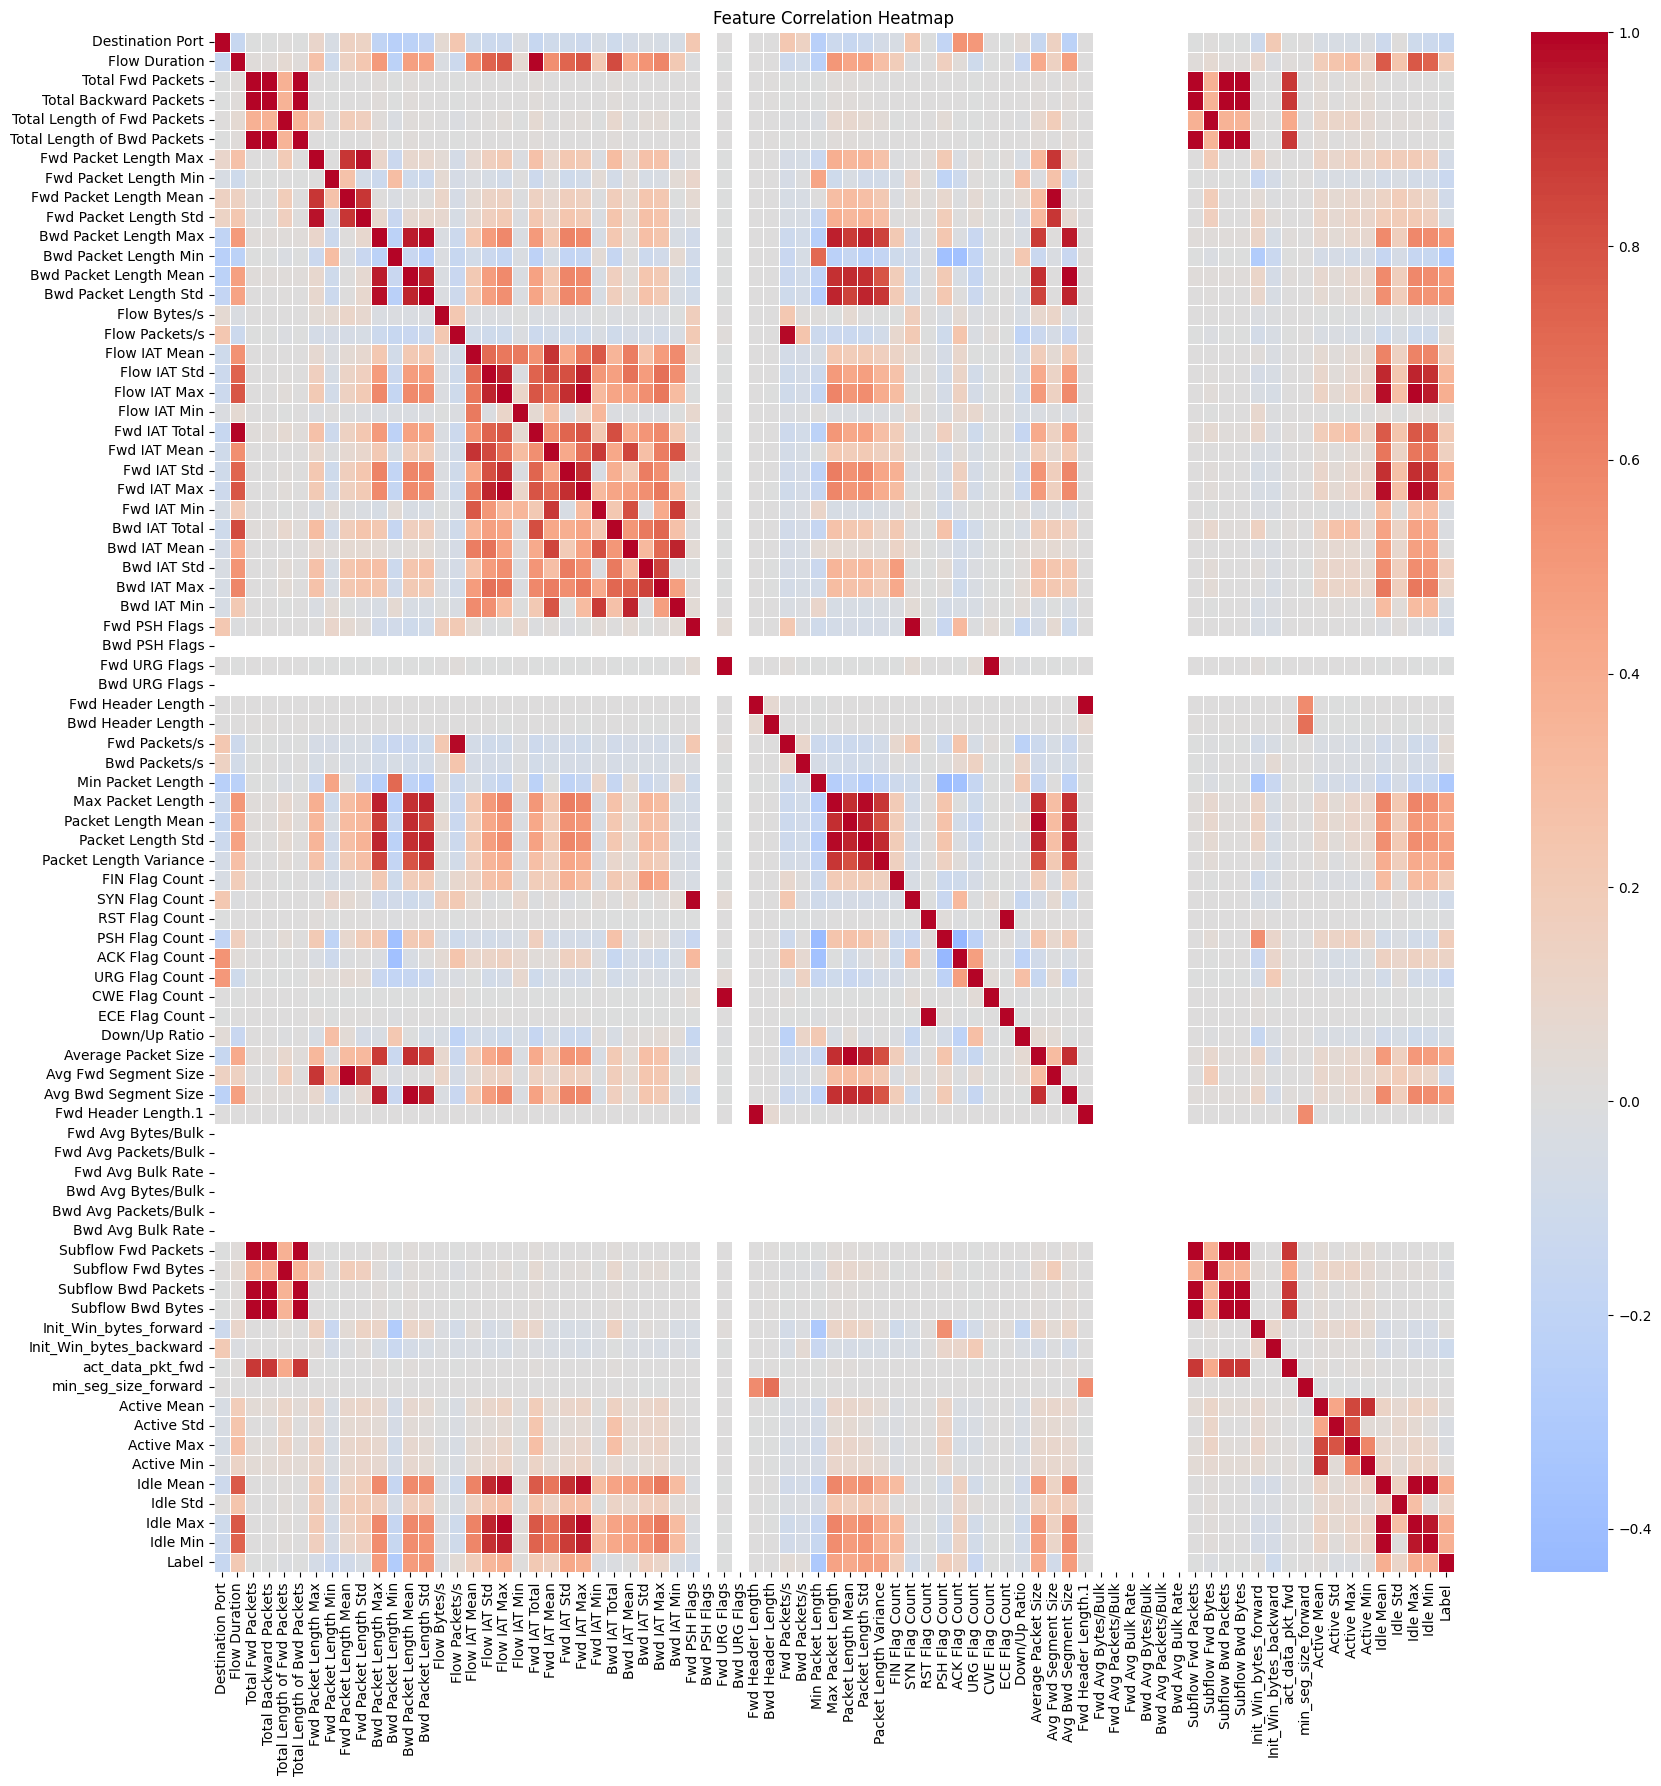

In [18]:
corr = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidth = 0.5)
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Correlation to Label

In [19]:
corr_threshold = 0.5
# columns with high correlation to Label
high_corr_columns_label= corr[abs(corr['Label']) > corr_threshold].index.tolist()
# Remove Label from the list
high_corr_columns_label.remove('Label')

print(f"Columns with high correlation to Label (threshold = {corr_threshold}): {high_corr_columns_label}")

Columns with high correlation to Label (threshold = 0.5): ['Bwd Packet Length Std']


#### Correlation Between Features

In [20]:
corr_threshold = 0.95
# columns with high correlation to each other
high_corr_columns = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= corr_threshold:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            high_corr_columns.append((colname1, colname2))
            
print("Highly correlated columns (threshold = 0.99):")
for col1, col2 in high_corr_columns:
    print(f"{col1} and {col2} have correlation of {corr.loc[col1, col2]}")

Highly correlated columns (threshold = 0.99):
Total Backward Packets and Total Fwd Packets have correlation of 0.9990699513709912
Total Length of Bwd Packets and Total Fwd Packets have correlation of 0.9969928007533385
Total Length of Bwd Packets and Total Backward Packets have correlation of 0.9944292856837909
Fwd Packet Length Std and Fwd Packet Length Max have correlation of 0.9684135845690387
Bwd Packet Length Mean and Bwd Packet Length Max have correlation of 0.959023078142974
Bwd Packet Length Std and Bwd Packet Length Max have correlation of 0.9827775231577602
Fwd IAT Total and Flow Duration have correlation of 0.9985599326309139
Fwd IAT Max and Flow IAT Max have correlation of 0.9980843380305897
Fwd Packets/s and Flow Packets/s have correlation of 0.9875287409157988
Packet Length Std and Max Packet Length have correlation of 0.984412825567951
SYN Flag Count and Fwd PSH Flags have correlation of 1.0
CWE Flag Count and Fwd URG Flags have correlation of 1.0
ECE Flag Count and RST 

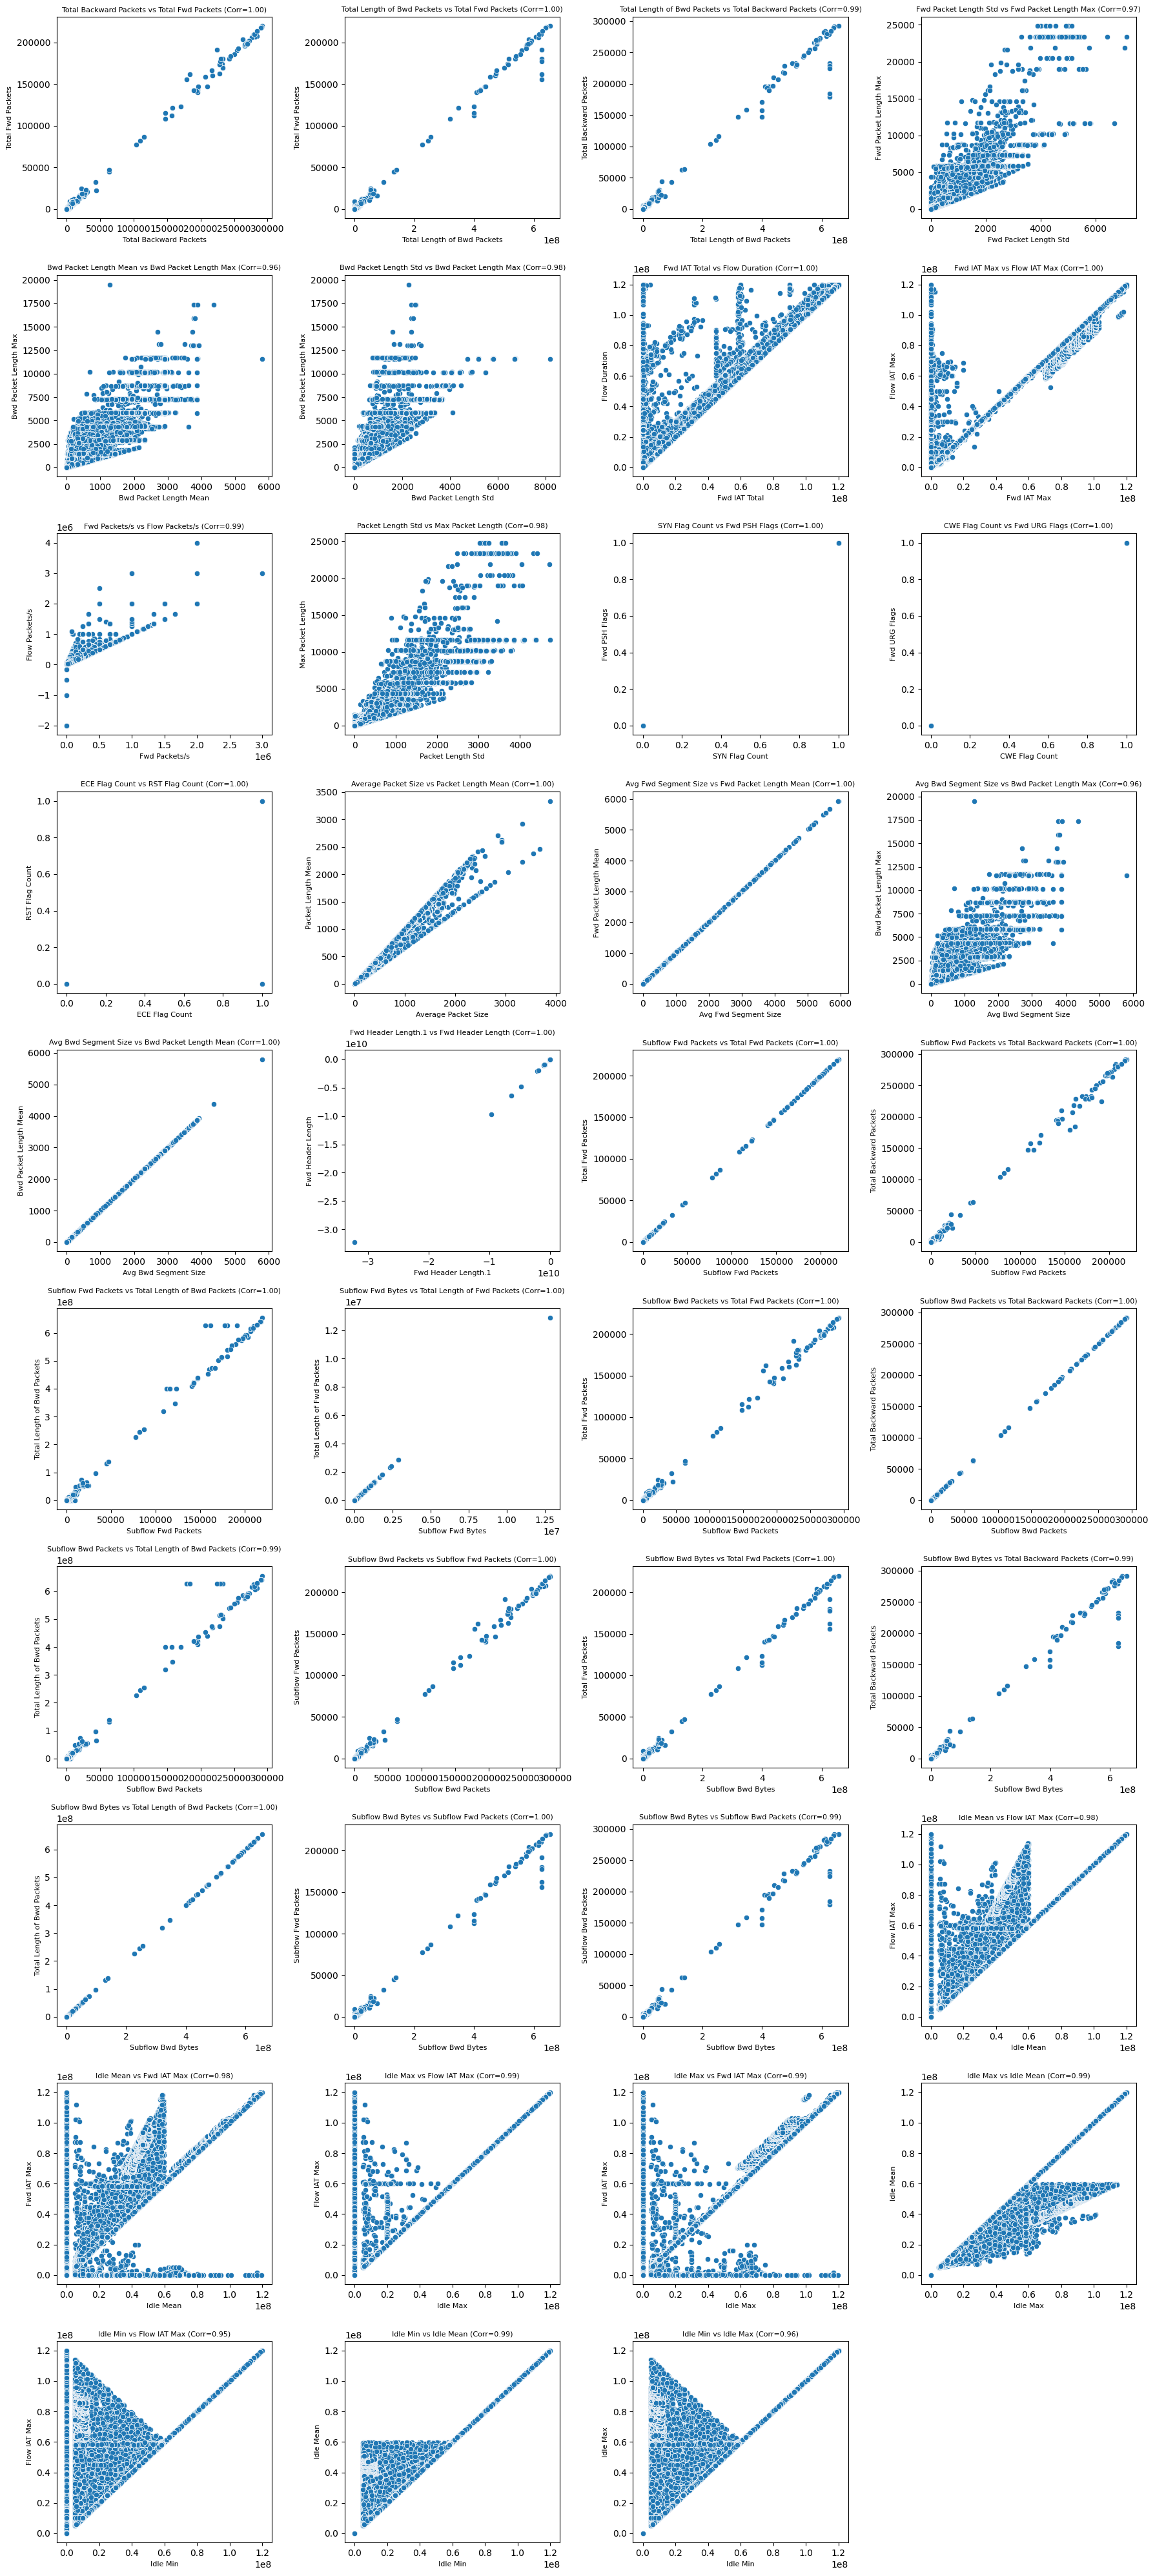

In [22]:
# Plotting the pairs with very high correlation for better visualization

n_plots = len(high_corr_columns)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, item in enumerate(high_corr_columns):
    feature_x = item[0]
    feature_y = item[1]
    corr_value = corr.loc[feature_x, feature_y]

    # Scatter plot
    sns.scatterplot(x=data[feature_x], y=data[feature_y], ax=axes[i])
    axes[i].set_title(f'{feature_x} vs {feature_y} (Corr={corr_value:.2f})', fontsize=8)
    axes[i].set_xlabel(feature_x, fontsize=8)
    axes[i].set_ylabel(feature_y, fontsize=8)

# Hide any unused subplots
for j in range(len(high_corr_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

By evaluating the plots, we can identify some features with perfect/near-perfect linear correlation. Removing one instance can reduce redundancy and mitigate potential issues with multicollinearity in models.

In [23]:
columns_to_drop = [
    "Fwd PSH Flags",
    "Fwd URG Flags",
    "Avg Fwd Segment Size",
    "Avg Bwd Segment Size",
    "Fwd Header Length.1",
    "Subflow Fwd Packets",
    "Subflow Fwd Bytes",
    "Subflow Bwd Packets",
    "Subflow Bwd Bytes",
]

data.drop(columns=columns_to_drop, inplace=True)

print("No.of columns after dropping highly correlated columns: ", data.shape[1])

No.of columns after dropping highly correlated columns:  70


### Outliers

In [ ]:
# Calculate outliers percentage
outlier_percentages = {}

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate percentage of outliers
        outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        outlier_percentage = (outliers / len(data)) * 100
        outlier_percentages[column] = outlier_percentage

<Figure size 1500x1000 with 0 Axes>

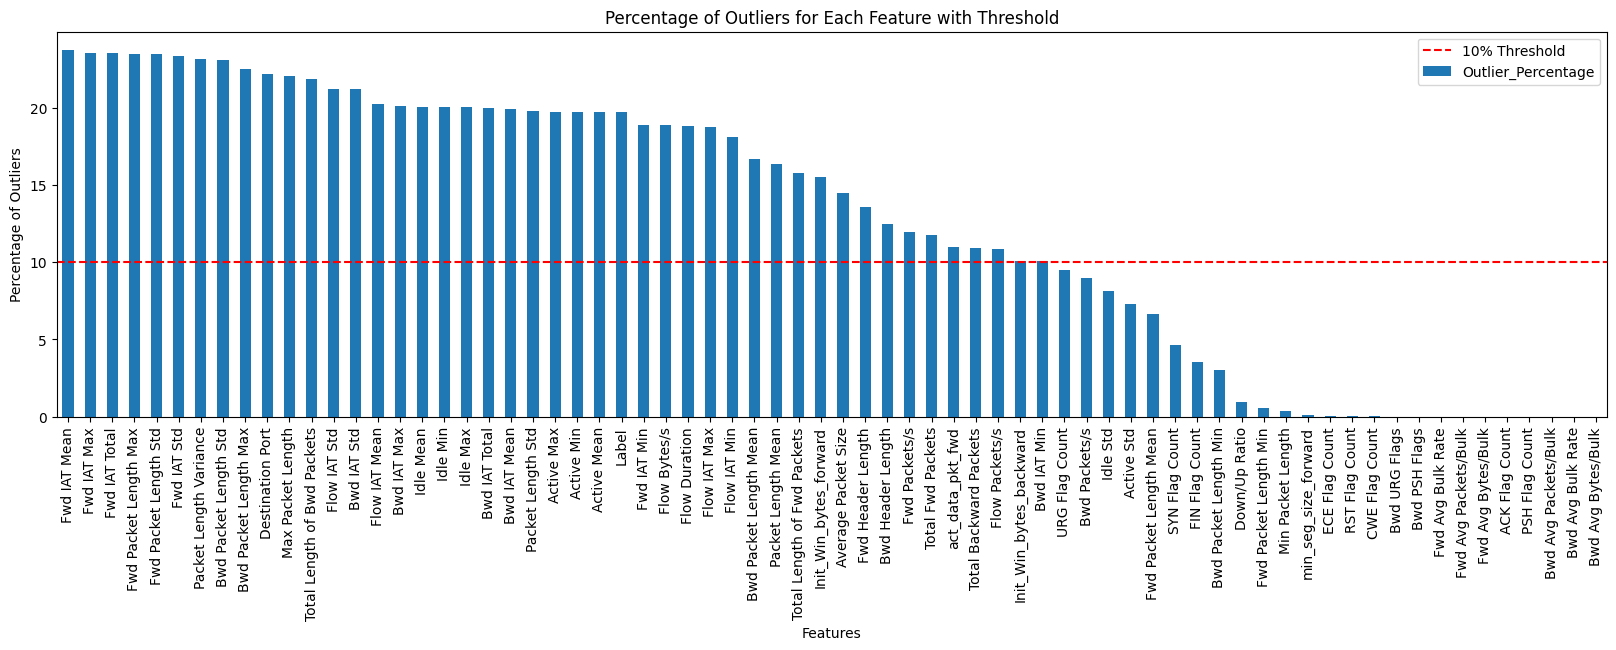

In [26]:
# Convert to DataFrame for easier manipulation
outliers_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier_Percentage'])

# Define the threshold for concern
threshold = 10

# Identify features with high percentage of outliers
high_outlier_features = outliers_df[outliers_df['Outlier_Percentage'] > threshold]

# Plot the outlier percentages and highlight features above the threshold
plt.figure(figsize=(15, 10))
outliers_df.sort_values(by='Outlier_Percentage', ascending=False).plot(kind='bar', legend=False, figsize=(20, 5))
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold}% Threshold')
plt.xlabel('Features')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers for Each Feature with Threshold')
plt.legend()
plt.show()

In [27]:
# Print the features with high outlier percentages
print(f"Features with outlier percentage above {threshold}%:\n")
print(high_outlier_features.sort_values('Outlier_Percentage', ascending=False))

# Cleaning up
del outliers_df

Features with outlier percentage above 10%:

                             Outlier_Percentage
Fwd IAT Mean                          23.733451
Fwd IAT Max                           23.537707
Fwd IAT Total                         23.519126
Fwd Packet Length Max                 23.464299
Fwd Packet Length Std                 23.455291
Fwd IAT Std                           23.333768
Packet Length Variance                23.122622
Bwd Packet Length Std                 23.112978
Bwd Packet Length Max                 22.506882
Destination Port                      22.158317
Max Packet Length                     22.040185
Total Length of Bwd Packets           21.868675
Flow IAT Std                          21.178539
Bwd IAT Std                           21.176560
Flow IAT Mean                         20.260970
Bwd IAT Max                           20.086740
Idle Max                              20.040074
Idle Mean                             20.040074
Idle Min                              20.04

### Duplicates and Unique Values

In [28]:
# Checking and counting duplicates
duplicates = data.duplicated()
duplicate_count = duplicates.sum()

# Output results
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 308381


In [29]:
# Removal of duplicates
data = data.drop_duplicates(keep='first')
del duplicates
data.shape

(2522362, 70)

In [30]:
# Identify columns with identical data
identical_columns = {}
columns = data.columns
list_control = columns.copy().tolist()

# Compare each pair of columns
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            if data[col1].equals(data[col2]):
                if (col1 not in identical_columns) and (col1 in list_control):
                    identical_columns[col1] = [col2]
                    list_control.remove(col2)
                elif (col1 in identical_columns) and (col1 in list_control):
                    identical_columns[col1].append(col2)
                    list_control.remove(col2)

# Print the result
if identical_columns:
    print("Identical columns found:")
    for key, value in identical_columns.items():
        print(f"'{key}' is identical to {value}")
else: print("No identical columns found.")

Identical columns found:
'Bwd PSH Flags' is identical to ['Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [31]:
for key, value in identical_columns.items():
    data.drop(columns=value, inplace=True)

In [32]:
# Check for numeric columns that contain only a single unique value, indicating no diversity in values.
# Such columns contribute no useful information to the analysis and may be candidates for removal.
only_unique_cols = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        only_unique_cols.append(col)
        print(col)

print(f'\nThe number of columns with only one unique values is: {len(only_unique_cols)}')

Bwd PSH Flags

The number of columns with only one unique values is: 1


In [33]:
# Dropping the columns with only one unique value
data.drop(only_unique_cols, axis=1, inplace=True)
del only_unique_cols